In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cust = pd.read_csv('olist_customers_dataset.csv')

In [3]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
cust.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [3]:
orders = pd.read_csv('olist_orders_dataset.csv', 
                     parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [10]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [11]:
orders.shape

(99441, 8)

In [15]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

<i>количество уникальных order_id = количеству записей, значит на 1 заказ, есть только 1 запись. Можно сделать вывод, что заказ содержит актуальный (последний) статус</i>

In [31]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Сколько у нас пользователей, которые совершили покупку только один раз?

Посмотрим на статусы заказов invoiced unavailable и canceled. 

In [6]:
orders.query("order_status == 'invoiced'").head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
2649,c3a6dc9afef5794ea4a867b5a18e0ad1,0c305f688ce08dc9402a2164fd6f29d6,invoiced,2017-11-25 14:10:20,2017-11-25 17:32:57,NaT,NaT,2017-12-19
2873,566c5bff1142c9d6003a83fd2e8ad1e5,892022d497c9598ce4a313f64ceaa87e,invoiced,2017-11-23 18:03:23,2017-11-23 18:25:18,NaT,NaT,2017-12-18
3121,b4c9f083bce61caf47fb38f9ba058bce,6ce60503e530d8a67926e9b8e3fdb635,invoiced,2017-08-05 16:00:56,2017-08-05 16:15:16,NaT,NaT,2017-08-30
3615,f029d5966aa03c87e17e2482f86202b1,ece9fb6661a1dc0cd93f5f8c9cf13b83,invoiced,2017-10-23 21:44:36,2017-10-23 21:56:09,NaT,NaT,2017-11-14
3983,6a828279d73f18174dd3b9c653d5213d,c994647aae9a45b8ae6eb75b77354ed3,invoiced,2017-06-25 17:54:26,2017-06-25 18:05:22,NaT,NaT,2017-07-14


In [7]:
orders.query("order_approved_at == 'NaT'").order_status.unique()

array(['canceled', 'delivered', 'created'], dtype=object)

<i>Если поле order_approved_at - пустое и статуса заказа invoiced нет, делаю вывод, что <b>invoiced = оплачено, а не просто выставлен счет</b></i>

In [21]:
orders.query("order_status == 'unavailable'").head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27
1579,ee0db22a8e742b752914016708470ec8,aae50600d30bf2efe013ca4c1754ded7,unavailable,2017-08-24 11:04:41,2017-08-24 11:15:11,NaT,NaT,2017-09-18
1826,6ad57aecbae806a7e9cc2cdb6b380711,d31dbd02ac052d662285f678f8994326,unavailable,2017-11-30 07:48:24,2017-11-30 08:14:42,NaT,NaT,2017-12-29
2148,9f3458f0433d4cfa472f4682654b8d49,99ebfafde8b9e58fd12db9d5cc83132f,unavailable,2017-07-18 23:36:55,2017-07-18 23:50:17,NaT,NaT,2017-08-09
2296,f0df036e9be21fc238f131bbfcdde769,1fa16395beca89233661543954ca6cf1,unavailable,2017-02-24 23:39:21,2017-02-24 23:45:14,NaT,NaT,2017-04-07
2316,86f0bcd9b426a2c1022ae317c7f27be6,dd24965dd5aa551df36ce4baf180445b,unavailable,2017-03-08 15:13:03,2017-03-08 15:13:03,NaT,NaT,2017-03-29


In [22]:
orders.query("order_status == 'canceled'").head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaT,NaT,2018-08-22
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaT,NaT,2017-03-30
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13


<b> <i>За покупки будем считать все заказы, кроме заказов в статусе canceled</i></b> 

In [4]:
orders_w_o_canceled = orders.query("order_status != 'canceled'")

In [5]:
orders_w_cust = orders_w_o_canceled.merge(cust, on = 'customer_id')

In [26]:
orders_w_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [6]:
orders_w_cust.groupby('customer_unique_id', as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns = {'order_id':'count_orders'})\
    .sort_values('count_orders', ascending = False)\
    .count_orders.value_counts()

1     92636
2      2688
3       187
4        30
5         8
6         6
7         3
17        1
9         1
Name: count_orders, dtype: int64

In [56]:
orders_w_cust.groupby('customer_unique_id', as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns = {'order_id':'count_orders'})\
    .query('count_orders > 2')

,customer_unique_id,count_orders
1088,02e9109b7e0a985108b43e573b6afb23,3
1533,041caba6a63ace5818387698ea85cdb2,3
2483,06a52782a04f0086d16b9c22d0e29438,3
2894,07b1b60bca2b6326fa2adb259ea4a55f,3
3116,083ca1aa470c280236380973a48f77c6,4
...,...,...
94216,fc719c11b4dce594f47e1f9aa739a3a2,3
94629,fd8ccc89be43894d2553494c71a61fd8,3
94930,fe59d5878cd80080edbd29b5a0a4e1cf,3
95001,fe81bb32c243a86b2f86fbf053fe6140,5


### 92636 клиентов совершили только 1 покупку

___

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [7]:
orders_w_cust_w_canceled = orders.merge(cust, on = 'customer_id')

За недоставленные заказы будем принимать те, у которых отсутсвует дата фактической доставки

In [8]:
orders_w_cust_w_canceled.order_delivered_customer_date.isnull().sum()

2965

посмотрим на распределение статусов по заказам с пустой датой фактической доставки

In [40]:
orders_w_cust_w_canceled.query("order_delivered_customer_date == 'NaT'").order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

Полагаю, что заказы со статусом shipped - еще не успели доставиться, invoiced, processing, created, approved - еще не были переданы в доставку                                   
<b>Посмотрим что это за заказы такие у которых статус delivered, но дата пустая</b>

In [13]:
orders_w_cust_w_canceled.query("order_delivered_customer_date == 'NaT' and order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP


Выглядит как баг в данных

###### Посмотрим на заказы, где order_delivered_carrier_date пусто, какие там есть статусы

In [14]:
orders_w_cust_w_canceled.query("order_delivered_carrier_date == 'NaT'").order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [9]:
orders_w_cust_w_canceled['Order_Year_month'] = orders_w_cust_w_canceled.order_purchase_timestamp.dt.to_period("M")

In [60]:
orders_w_cust_w_canceled.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10


In [10]:
#оставим только статусы unavailable и canceled
reasons = orders_w_cust_w_canceled.query("order_status == 'unavailable' or order_status == 'canceled'")\
    .groupby(['Order_Year_month', 'order_status'], as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns = {'order_id':'count_orders'})\
    .groupby('order_status', as_index = False)\
    .agg({'count_orders':'mean'})\
    .rename(columns = {'order_status':'reason', 'count_orders':'avg_undelivered_offers_by_month'})

In [62]:
reasons

,reason,avg_undelivered_offers_by_month
0,canceled,26.041667
1,unavailable,29.000000


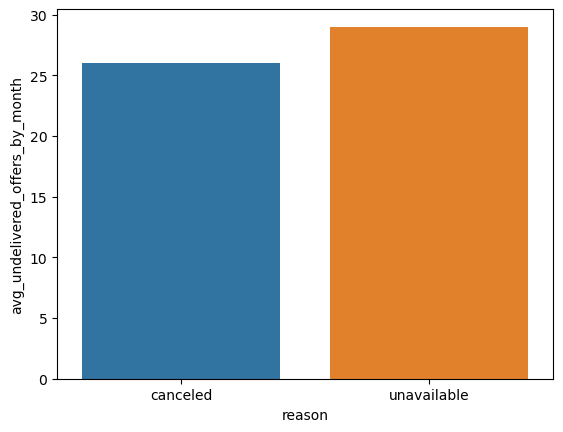

In [63]:
sns.barplot(data=reasons, x="reason", y="avg_undelivered_offers_by_month");

##### В среднем, 26 заказов в месяц не доставляются по причине отмены и 29 по причине отсутствия товаров

___

### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [11]:
orders_w_cust_w_canceled['Week_day'] = orders_w_cust_w_canceled.order_purchase_timestamp.dt.day_name()

In [69]:
orders_w_cust_w_canceled.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month,Week_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,Monday


In [72]:
orders_w_cust_w_canceled.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Order_Year_month', 'Week_day'],
      dtype='object')

In [12]:
order_by_week_day = orders_w_cust_w_canceled.drop(['customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Order_Year_month'], axis =1)

In [19]:
order_by_week_day.head()

,order_id,Week_day
0,e481f51cbdc54678b7cc49136f2d6af7,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,Tuesday


In [13]:
items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [82]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [83]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [87]:
items.product_id.nunique()

32951

In [88]:
items.shape

(112650, 7)

In [14]:
items_w_weekday = items.merge(order_by_week_day, on = 'order_id')

In [85]:
items_w_weekday.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Week_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Saturday


In [15]:
most_freq_week_day = items_w_weekday.groupby(['product_id', 'Week_day'], as_index = False)\
                        .agg({'order_id':'count'})\
                        .rename(columns = {'order_id':'count'})\
                        .sort_values('count', ascending = False)\
                        .drop_duplicates(subset=['product_id'], keep = 'first')\
                        .reset_index(drop=True)
    
    
    

In [16]:
most_freq_week_day.head()

,product_id,Week_day,count
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
4,389d119b48cf3043d311335e499d9c6b,Thursday,67


##### Определили в какой день недели какой товар чаще покупается. ПРи желании count можно дропнуть

___

### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

Формировать когорты будем по дате первой покупки<br>
Размер когорты - 1 месяц<br>
Отчетный период - январь-декабрь<br>
Анализируемый показатель - Retention rate

In [20]:
orders_w_cust['Order_Year_month'] = orders_w_cust.order_purchase_timestamp.dt.to_period("M")
orders_w_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


In [24]:
orders_w_cust.Order_Year_month.sort_values().unique()

<PeriodArray>
['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08', '2018-09']
Length: 24, dtype: period[M]

##### Найдем дату первой покупки для каждого клиента

In [27]:
first_order_date = orders_w_cust.groupby('customer_unique_id', as_index = False)\
    .agg({'Order_Year_month':'min'})\
    .rename(columns = {'Order_Year_month':'First_order_date'})

In [43]:
orders_w_cust.shape

(98816, 13)

In [44]:
orders_w_cust = orders_w_cust.merge(first_order_date, on = 'customer_unique_id')

In [45]:
orders_w_cust.shape

(98816, 14)

In [47]:
orders_w_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month,First_order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-09
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09,2017-09
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11


In [49]:
orders_w_cust['is_active'] = (orders_w_cust['Order_Year_month'] > orders_w_cust['First_order_date'])*1

In [57]:
orders_w_cust.query("customer_unique_id == '083ca1aa470c280236380973a48f77c6'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month,First_order_date,is_active
31908,95287574a39117622fd74f06cadf5eae,9d763d8a54fb8bb371f06d0ec3d9a7de,delivered,2017-08-05 08:25:09,2017-08-05 08:35:43,2017-08-08 13:18:08,2017-08-18 19:03:51,2017-09-14,083ca1aa470c280236380973a48f77c6,58051,joao pessoa,PB,2017-08,2017-07,1
31909,acb08a83f62cfd54a98e76c21cd268fd,0c972ffe540bb0560f264c58899f5dc1,delivered,2017-07-28 04:06:33,2017-07-28 04:24:05,2017-07-28 17:58:07,2017-08-03 21:15:55,2017-08-29,083ca1aa470c280236380973a48f77c6,58051,joao pessoa,PB,2017-07,2017-07,0
31910,f79d2206d0301d47bc2a623636ea53d1,1309815f779a904c76a5e2398c57792f,shipped,2018-08-13 22:19:59,2018-08-13 22:30:15,2018-08-14 14:21:00,NaT,2018-08-30,083ca1aa470c280236380973a48f77c6,58051,joao pessoa,PB,2018-08,2017-07,1
31911,96dad13c399dce9663d3bd03e84cea2b,c5f246d8cb17193ef5b0e617c0f4a822,delivered,2017-08-16 05:43:05,2017-08-16 05:55:11,2017-08-17 16:27:52,2017-08-24 18:22:49,2017-09-27,083ca1aa470c280236380973a48f77c6,58051,joao pessoa,PB,2017-08,2017-07,1


In [66]:
orders_w_cust.query("First_order_date >= '2017-07' and First_order_date <= '2017-07'").is_active.sum()

138

In [69]:
orders_w_cust.query("First_order_date >= '2017-07' and First_order_date <= '2017-07'").sort_values('is_active', ascending = False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month,First_order_date,is_active
70475,9433f58821239b782c8861534af7e5bd,a667d6206dd2a9dea88b2f90902a8251,delivered,2018-06-11 17:36:32,2018-06-11 17:59:14,2018-06-12 15:09:00,2018-06-16 16:47:37,2018-07-03,d83257348027bd8c59a228cc034de5e3,14790,guaira,SP,2018-06,2017-07,1
12512,15e85e81d299aec57b1bbdba38422dff,5329a1b285ac348481efc2734780fa37,delivered,2017-08-15 08:31:44,2017-08-15 08:45:13,2017-08-15 19:22:29,2017-08-16 17:47:37,2017-08-28,cf32aeb4e8a323e6499a573ac5c90326,4087,sao paulo,SP,2017-08,2017-07,1
60681,850a46317b5a1b4eeb14f915fda637c1,372369c546ecd90999d87565c5400e82,delivered,2018-01-02 16:26:54,2018-01-02 16:37:35,2018-01-04 16:12:45,2018-01-26 20:37:33,2018-02-15,ec0f5b4fe392d71f361112c1b508b707,76803,porto velho,RO,2018-01,2017-07,1
77439,2fd592f3553f88b7489e09179c93f261,13f798d5b61ca9fbce91d7d2732080b1,delivered,2017-10-06 08:55:04,2017-10-07 02:35:24,2017-10-09 16:25:06,2017-10-13 17:54:43,2017-10-30,334293c291f43a6aa85020f8597a171f,13710,tambau,SP,2017-10,2017-07,1
34648,08d27643b4ade2434f167dc1ba237b4b,4098b5d8a1400003c8cccba5aa9ffdd2,delivered,2018-02-10 20:50:32,2018-02-12 09:48:51,2018-02-14 23:21:48,2018-02-23 23:04:41,2018-03-08,d42abb03c8796ea293a48772c24843c1,14770,colina,SP,2018-02,2017-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34139,a9893544355d8abefe6473f21f162c5b,1f2f1fd768ccbfb05764c5a6fc6ae3cd,delivered,2017-07-17 10:42:23,2017-07-18 06:05:25,2017-07-19 16:32:20,2017-07-26 13:21:33,2017-08-09,69e24da4c221777554eb9b421b4d5fb0,85460,quedas do iguacu,PR,2017-07,2017-07,0
34151,ca9e949cdccd6ccd93a7d31c7bbb90ae,6dc03b7785c3ad8b1f2f69a96afaf0d9,delivered,2017-07-31 17:29:07,2017-08-01 17:35:14,2017-08-02 19:06:50,2017-08-09 16:13:52,2017-08-22,e1f1862e74270220628e76ecc8d68f98,71950,taguatinga,DF,2017-07,2017-07,0
34153,4ed44a3f31464867648d26ef5ddb9826,67a62a16e3ad15ffc36f2c37147bde63,delivered,2017-07-24 21:41:53,2017-07-24 21:55:19,2017-07-28 14:49:55,2017-08-01 16:35:45,2017-08-15,1bf8dd3ba1288d5dc05d4e9f6557ed15,5756,sao paulo,SP,2017-07,2017-07,0
34169,3b37ea038e53ec7ddd17eaf745201db2,b814450275c3815ada3733398aee1a80,delivered,2017-07-31 15:26:22,2017-07-31 15:43:28,2017-08-04 19:07:41,2017-08-07 20:32:09,2017-08-18,beb7ddfca20bc721584e70834d3cd2f8,37500,itajuba,MG,2017-07,2017-07,0


In [67]:
orders_w_cust.query("First_order_date >= '2017-07' and First_order_date <= '2017-07'").is_active.count()

4080

In [58]:
orders_w_cust.query("Order_Year_month >= '2017-1' and Order_Year_month <= '2017-12'")\
    .pivot_table(index = 'First_order_date', columns = 'Order_Year_month', values = 'is_active', aggfunc = 'sum')

Order_Year_month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
First_order_date,,,,,,,,,,,,
2016-10,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,0.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0
2017-02,NaN,0.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0
2017-03,NaN,NaN,0.0,14.0,9.0,12.0,9.0,4.0,4.0,8.0,9.0,2.0
2017-04,NaN,NaN,NaN,0.0,15.0,6.0,5.0,7.0,6.0,9.0,7.0,7.0
2017-05,NaN,NaN,NaN,NaN,0.0,18.0,21.0,14.0,11.0,14.0,17.0,6.0
2017-06,NaN,NaN,NaN,NaN,NaN,0.0,14.0,12.0,13.0,8.0,12.0,11.0
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,0.0,22.0,13.0,10.0,13.0,8.0


In [59]:
orders_w_cust.query("Order_Year_month >= '2017-1' and Order_Year_month <= '2017-12'")\
    .pivot_table(index = 'First_order_date', columns = 'Order_Year_month', values = 'is_active', aggfunc = 'count')

Order_Year_month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
First_order_date,,,,,,,,,,,,
2016-10,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,796.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0
2017-02,NaN,1760.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0
2017-03,NaN,NaN,2643.0,14.0,9.0,12.0,9.0,4.0,4.0,8.0,9.0,2.0
2017-04,NaN,NaN,NaN,2365.0,15.0,6.0,5.0,7.0,6.0,9.0,7.0,7.0
2017-05,NaN,NaN,NaN,NaN,3642.0,18.0,21.0,14.0,11.0,14.0,17.0,6.0
2017-06,NaN,NaN,NaN,NaN,NaN,3185.0,14.0,12.0,13.0,8.0,12.0,11.0
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,3942.0,22.0,13.0,10.0,13.0,8.0


In [79]:
date_range = pd.DataFrame({'Date':pd.date_range('2017-01-01','2017-12-01', freq = 'MS')})

In [82]:
date_range

,Date,key
0,2017-01-01,1
1,2017-02-01,1
2,2017-03-01,1
3,2017-04-01,1
4,2017-05-01,1
5,2017-06-01,1
6,2017-07-01,1
7,2017-08-01,1
8,2017-09-01,1
9,2017-10-01,1


In [81]:
date_range['key'] = 1
first_order_date['key'] = 1

In [83]:
first_order_date.merge(date_range, on = 'key')

,customer_unique_id,First_order_date,key,Date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,2017-01-01
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,2017-02-01
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,2017-03-01
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,2017-04-01
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,2017-05-01
...,...,...,...,...
1146715,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,1,2017-08-01
1146716,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,1,2017-09-01
1146717,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,1,2017-10-01
1146718,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,1,2017-11-01
